In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


# Precio y area construida

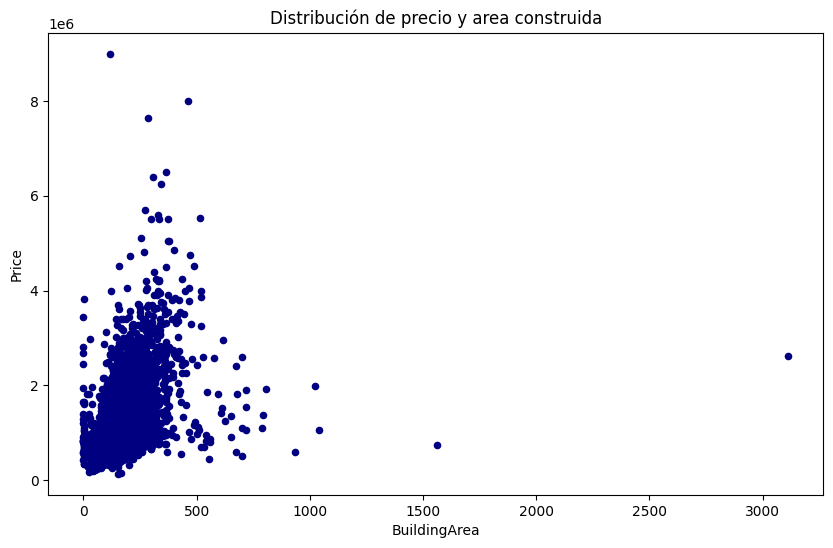

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


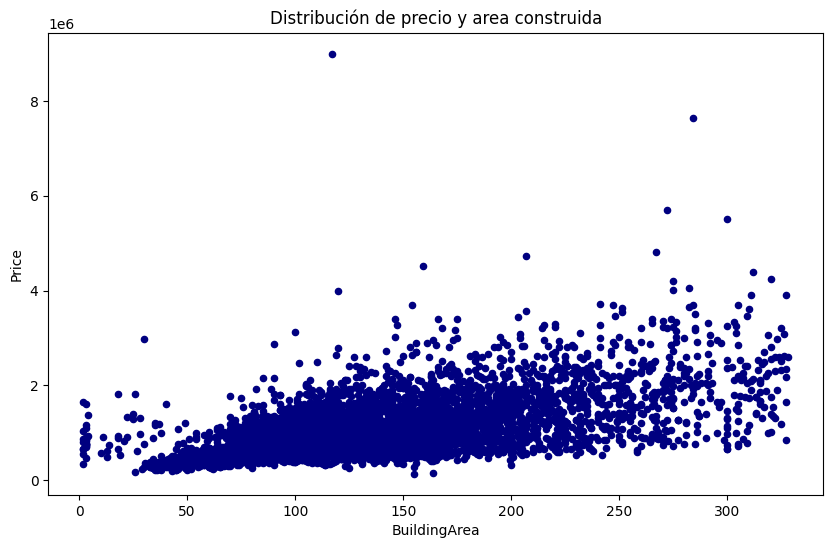

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Se eliminan los registros igual a cero
df0 = df0[df0["BuildingArea"]>= 0]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


# Precio y Bedroom2

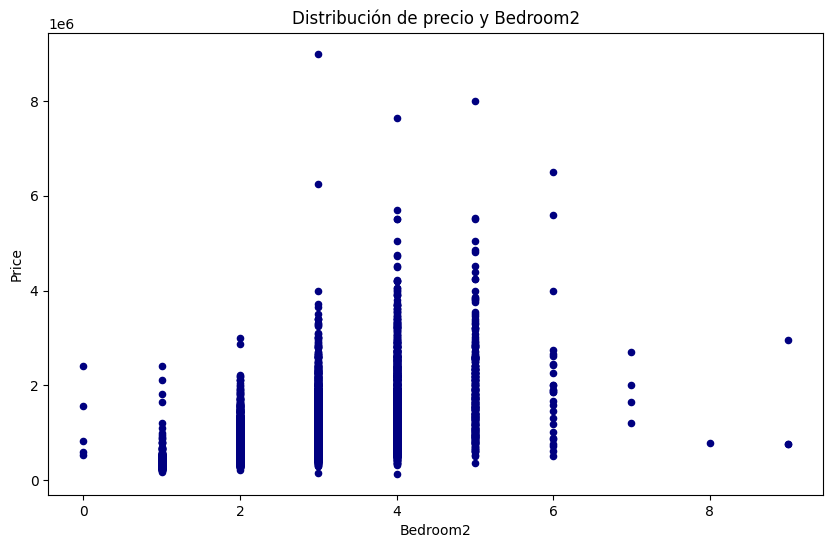

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Bedroom2', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y Bedroom2');

In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['Bedroom2']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


In [ ]:
#Se eliminan los registros igual a cero
df0 = df0[df0["Bedroom2"]>= 0]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


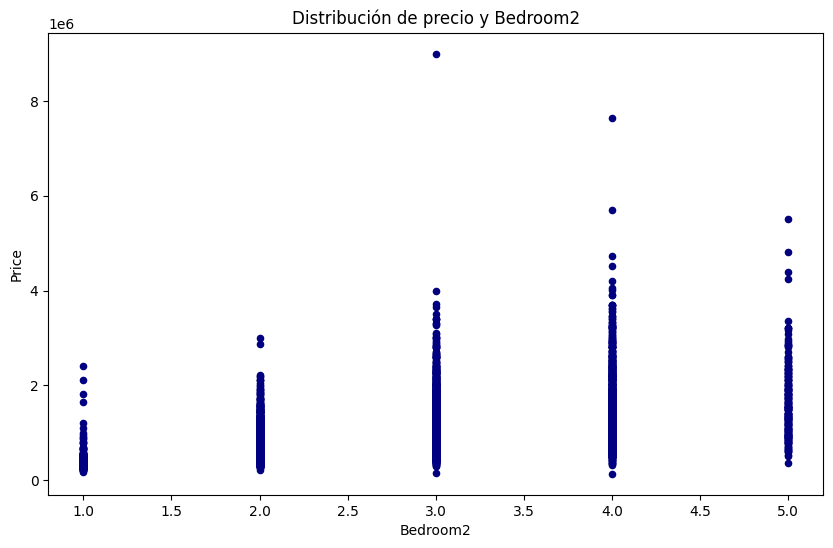

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Bedroom2', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y Bedroom2');

# Precio y Bathroom

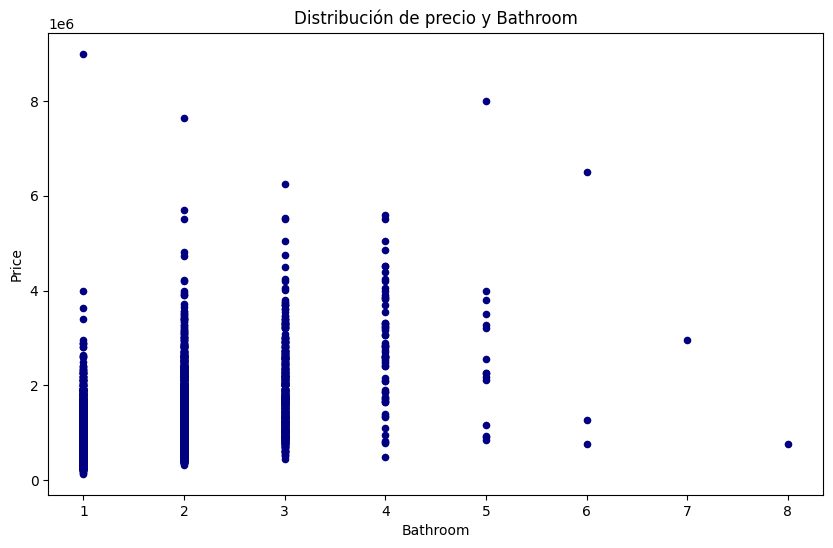

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Bathroom', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y Bathroom');

In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['Bathroom']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


In [ ]:
#Se eliminan los registros igual a cero
df0 = df0[df0["Bathroom"]>= 0]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,635000.0,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,1975.0,-37.68026,144.88468,2474.0
12205,3,601000.0,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,-37.51232,145.13282,2170.0
12206,3,1050000.0,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,-37.86558,144.90474,6380.0
12207,1,385000.0,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,-37.85588,144.89936,6380.0


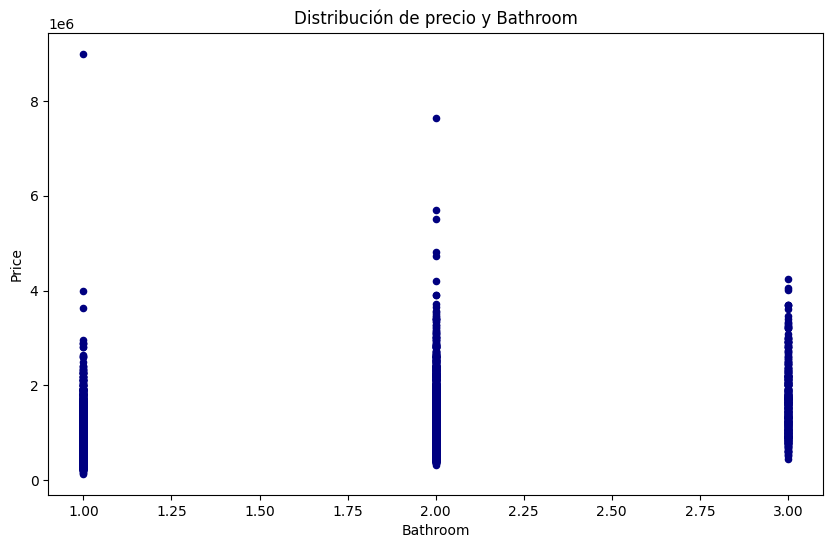

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Bathroom', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y Bathroom');

In [ ]:
#Correlación entre variables
corr_test = pearsonr(x = df['Bathroom'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.4924808625951458
P-value:  0.0


In [4]:
#Correlación entre variables
corr_test2 = pearsonr(x = df['Bedroom2'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test2[0])
print("P-value: ", corr_test2[1])

NameError: ignored